<div style="background-color:#EBE7E1">

#
    
<p style="text-align: center;">
  <font face="Segoe Script" size="6" color='#0A1781'>
    <strong>Data Science Para Análise Multivariada de Dados</strong>
  </font>
</p>
<p style="text-align: center;">
<font face="Segoe Print" size="6.5" color='#C58A1E'>
    <strong>Visualizações Para Análise Multivariada<br \>com Linguagem Python
</strong></font>
</p>

#
</div>

<div style="background-color:#F4F4F4">
<p style="text-align: right;">
  <font face="Segoe Script" size="4" color='#444444'>
    Roberto Soares - DSA<br \>[+] Faturamento,<br \> [-] Custo,<br \> [+] Qualidade de vida  
  </font>
</p>
<p style="text-align: right;"><font face="Segoe Print" size="2" color='#444444'>
<a href="https://www.linkedin.com/in/roberto-soares-full-stack-data-scientist/">in/roberto-soares-full-stack-data-journey</a> 

<p style="text-align: right;"><font face="Segoe Print" size="2" color='#444444'>    
<a href="https://github.com/roberto-ssoares/roberto-ssoares.github.io">Portifólio: roberto-ssoares</a>
</div>

<div style="background-color:#EBE7E1">
    
## <font face="Segoe Print" size="4" color='#CC403E'>Instalando e Carregando Pacotes</font>

<td>
<font face="Segoe Print" size="2" color='#66666'>
    
- Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
- pip install -U nome_pacote

- Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
- !pip install nome_pacote==versão_desejada

- Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

- Instala o pacote watermark.
- Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
</font>
</td>

In [1]:
#!pip install -q -U watermark

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.manifold import TSNE
from pandas.plotting import parallel_coordinates
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Roberto Soares - DSA" 

Author: Roberto Soares - DSA



<div style="background-color:#EBE7E1">
    
## <font face="Segoe Print" size="4" color='#CC403E'><strong>Fonte de Dados</strong></font>

<font face="Segoe Print" size="3" color='#66666'>

Os dados usados neste notebook foram extraídos e adaptados das fontes abaixo:

- https://sofifa.com/
- https://pokemondb.net/pokedex
- https://archive.ics.uci.edu/dataset/53/iris


<div style="background-color:#EBE7E1">
    
## <font face="Segoe Print" size="5" color='#CC403E'><strong>Trabalhando com o Dataset 1</strong></font>

<font face="Segoe Print" size="3" color='#66666'>

- O conjunto de dados contém mais de 17 mil jogadores únicos e mais de 60 colunas,
- informações gerais e todos os KPIs que o famoso videogame oferece.
- Este repositório ajuda jogadores viciados em FIFA (como nós) a construir um Dream Team no modo Manager usando estatísticas de jogadores da plataforma SoFIFA.

In [ ]:
caminho = "/Data-Analysis-Projects/Visualizations-for-Multivariate-Analysis/datalake/"
dataset1_csv = 'dataset1.csv'
dataset2_csv = 'dataset2.csv'
dataset3_csv = 'dataset3.csv'

In [4]:
# Carrega o dataset
df1 = pd.read_csv("dataset1.csv")

In [5]:
# Shape
df1.shape

(17500, 77)

In [6]:
# Amostra
df1.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,...,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,...,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,...,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,...,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


<div style="background-color:#EBE7E1">
    
### <font face="Segoe Print" size="4" color='#CC403E'><strong>Multivariate Scatter Plot</strong></font>

<font face="Segoe Print" size="3" color='#66666'>

Este gráfico de dispersão usa três variáveis. 
- O eixo horizontal (x) rastreia o **Valor** do jogador (quão bem ele é pago).
- O eixo vertical (y) rastreia a pontuação **geral** do jogador em todos os fundamentos.
- E a cor (o parâmetro **hue**) rastreia em qual das três categorias de interesse o jogador (que o ponto representa) está.

https://seaborn.pydata.org/generated/seaborn.lmplot.html

- Os dados do gráfico e o modelo de regressão se ajustam a um FacetGrid.- 
Esta função combina regplot ()e FacetGri
- Pretende ser uma interface conveniente para ajustar modelos de regressão em subconjuntos condicionais de um conjunto de dados.s.

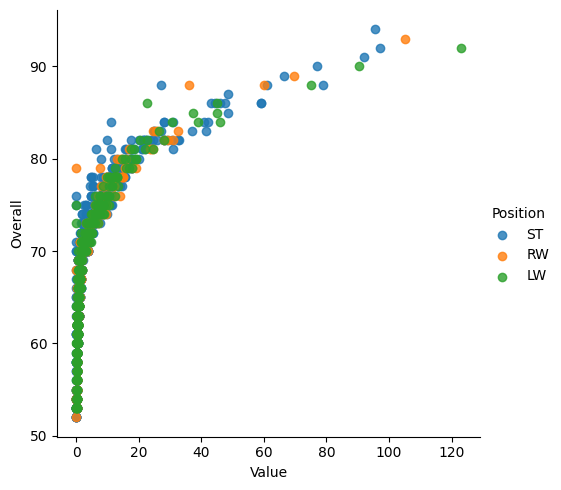

In [7]:
# Plot
sns.lmplot(x = 'Value', 
           y = 'Overall', 
           hue = 'Position', 
           data = df1.loc[df1['Position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg = False);

<div style="background-color:#EBE7E1">
    
<font face="Segoe Print" size="3" color='#66666'>

A cor fornece um visual esteticamente agradável, mas pode ser difícil de analisar o gráfico. 

Outro exemplo de encoding visual é a **forma** do marcador:

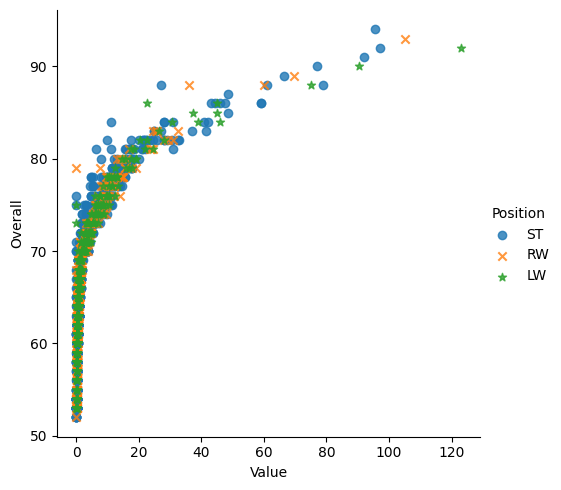

In [8]:
# Plot
sns.lmplot(x = 'Value', 
           y = 'Overall', 
           markers = ['o', 'x', '*'], 
           hue = 'Position',
           data = df1.loc[df1['Position'].isin(['ST', 'RW', 'LW'])],
           fit_reg = False);

<div style="background-color:#EBE7E1">
    
### <font face="Segoe Print" size="4" color='#CC403E'><strong>Ajustando os Dados Para o Multivariate Scatter Plot</strong></font>

<font face="Segoe Print" size="3" color='#66666'>




In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 17500 non-null  object 
 1   Age                  17500 non-null  int64  
 2   Photo                17500 non-null  object 
 3   Nationality          17500 non-null  object 
 4   Flag                 17500 non-null  object 
 5   Overall              17500 non-null  int64  
 6   Potential            17500 non-null  int64  
 7   Club                 17253 non-null  object 
 8   Club Logo            17500 non-null  object 
 9   Value                17500 non-null  float64
 10  Wage                 17500 non-null  object 
 11  Special              17500 non-null  int64  
 12  Acceleration         17500 non-null  object 
 13  Aggression           17500 non-null  object 
 14  Agility              17500 non-null  object 
 15  Balance              17500 non-null 

<div style="background-color:#EBE7E1">
    
<font face="Segoe Print" size="3" color='#66666'>

> Ajustando o tipo de dado de algumas colunas

In [10]:
cols_to_convert = ['Overall', 'Potential', 'Acceleration', 'Dribbling', 'Finishing', 'Strength']

In [11]:
df1[cols_to_convert].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Overall       17500 non-null  int64 
 1   Potential     17500 non-null  int64 
 2   Acceleration  17500 non-null  object
 3   Dribbling     17500 non-null  object
 4   Finishing     17500 non-null  object
 5   Strength      17500 non-null  object
dtypes: int64(2), object(4)
memory usage: 820.4+ KB


In [12]:
df1[cols_to_convert] = df1[cols_to_convert].apply(pd.to_numeric, errors = 'coerce')

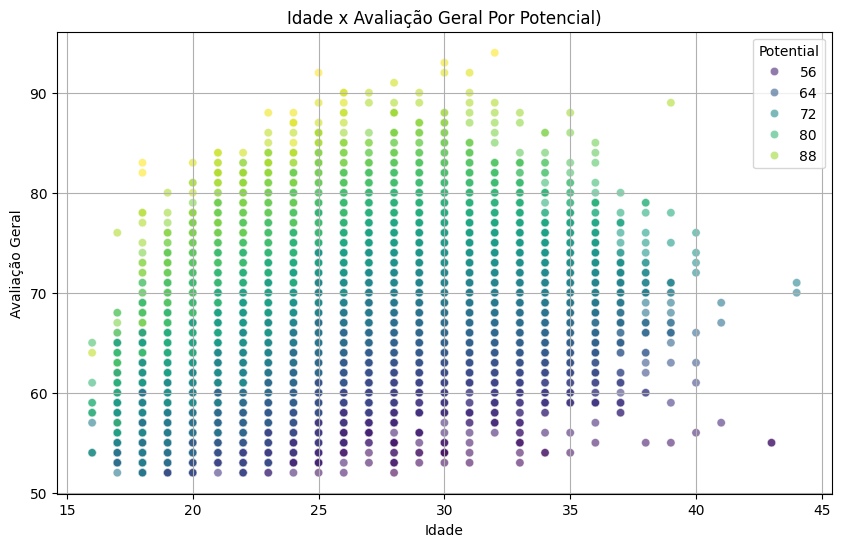

In [13]:
# Plot
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df1, x = 'Age', y = 'Overall', hue = 'Potential', palette = 'viridis', alpha = 0.6)
plt.title('Idade x Avaliação Geral Por Potencial)')
plt.xlabel('Idade')
plt.ylabel('Avaliação Geral')
plt.grid(True)
plt.show()

<div style="background-color:#EBE7E1">
    
### <font face="Segoe Print" size="4" color='#CC403E'><strong>Grouped Box Plot</strong></font>

<font face="Segoe Print" size="3" color='#66666'>

Outro gráfico para análise multivariada é o box plot agrupado. Este gráfico aproveita o **agrupamento**. 

Suponha que estejamos interessados na seguinte questão: 

- **Os Atacantes pontuam mais em “Agressão” do que os Goleiros?**

https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [14]:
# Prepara os dados
df = (df1.loc[df1['Position'].isin(['ST', 'GK'])].loc[:, ['Value', 'Overall', 'Aggression', 'Position']])
df = df[df["Overall"] >= 80]
df = df[df["Overall"] < 85]
df['Aggression'] = df['Aggression'].astype(float)

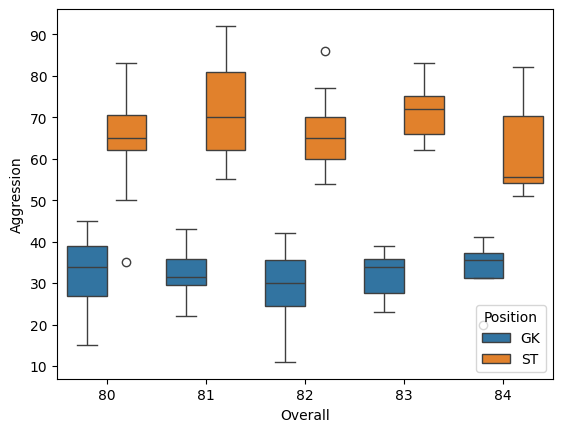

In [15]:
# Plot
sns.boxplot(x = "Overall", 
            y = "Aggression", 
            hue = 'Position', 
            data = df);

<div style="background-color:#EBE7E1">
    
<font face="Segoe Print" size="3" color='#66666'>

Como você pode observar, este gráfico demonstra conclusivamente que, em nosso conjunto de dados, 
- os goleiros (pelo menos aqueles com uma pontuação geral entre 80 e 85) têm pontuações de Agressão mais baixas do que os atacantes.

Neste gráfico, 
- o eixo horizontal representa a pontuação **Geral**,
- o eixo vertical representa a pontuação **Agressão**
- e o agrupamento codifica a **Posição**.

O agrupamento é uma variável visual extremamente comunicativa e torna este gráfico muito fácil de interpretar. 

No entanto, tem cardinalidade muito baixa; é muito difícil usar grupos para ajustar mais do que um punhado de valores categóricos. 

<div style="background-color:#EBE7E1">
    
## <font face="Segoe Print" size="5" color='#CC403E'><strong>Trabalhando com o Dataset 2</strong></font>

<font face="Segoe Print" size="3" color='#66666'>

- A seção Pokédex contém muitas informações sobre todas as criaturas Pokémon de toda a série de jogos.
- Nas páginas da lista principal você pode ver as diversas estatísticas de cada Pokémon.
- Clique no nome de um Pokémon para ver uma página detalhada com dados do Pokédex, descrições de jogos anteriores, sprites, evoluções, movimentos e muito mais!

Sobre estatísticas de Pokémon

Cada criatura Pokémon possui uma série de estatísticas
-  **HP** (Hit Points) é a força vital de um Pokémon
-  Se o HP do seu Pokémon chegar a zero, ele desmaia e não poderá mais ser usado em batalha (embora ainda possa usar Máquinas Ocultas)

 A estatística de **velocidade** decide qual Pokémon dará o primeiro passo na batalha
-  Esta estatística pode ser crítica em batalhas longas.

**Ataque e Ataque Especial** medem a força dos movimentos usados ​​pelo seu Pokémon; quanto mais alto for, mais dano você causará aos oponentes. 
- O Ataque corresponde aos movimentos da categoria Física, enquanto o Ataque Especial corresponde aos movimentos Especiais.

Da mesma forma, **Defesa e Defesa Especial** medem a capacidade de receber ataques de outros Pokémon; quanto maior a estatística, menos pontos de vida serão perdidos quando atacado.
- A Defesa corresponde aos movimentos da categoria Física, enquanto a Defesa Especial corresponde aos movimentos Especiais.

In [16]:
# Carrega o dataset
df2 = pd.read_csv("dataset2.csv", index_col = 0)

In [17]:
# Shape
df2.shape

(800, 12)

In [18]:
# Amostra
df2.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


<div style="background-color:#EBE7E1">
    
### <font face="Segoe Print" size="4" color='#CC403E'><strong>Mapa de Calor (Heatmap)</strong></font>

<font face="Segoe Print" size="3" color='#66666'>

Provavelmente, a visualização mais usada em análise multivariada é o **gráfico de correlação**, o qual mede a correlação entre cada par de valores em um conjunto de dados e representa graficamente um resultado em cores.

- https://seaborn.pydata.org/generated/seaborn.heatmap.html

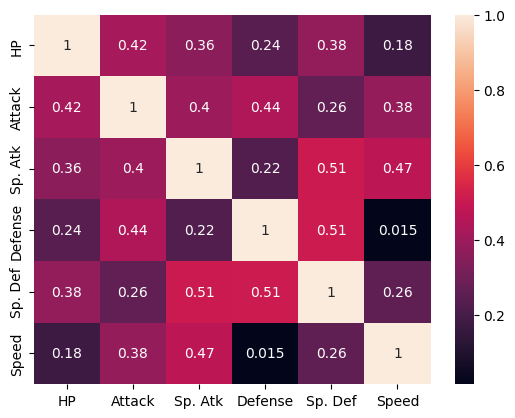

In [19]:
# Plot
sns.heatmap(df2.loc[:, ['HP', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def', 'Speed']].corr(),
            annot = True);

<div style="background-color:#EBE7E1">
    
### <font face="Segoe Print" size="4" color='#CC403E'><strong>Swarmplot</strong></font>

<font face="Segoe Print" size="3" color='#66666'>

Um Swarmplot é um tipo de gráfico de dispersão que é usado para mostrar a distribuição de dados categóricos, semelhante a um gráfico de caixa (boxplot) ou um gráfico de violino (violin plot). 

No entanto, o que distingue um Swarmplot é a maneira como ele representa cada ponto de dados individualmente, sem sobreposição, proporcionando uma representação clara da distribuição dos dados. 

- https://seaborn.pydata.org/generated/seaborn.swarmplot.html

O que é um swarmplot?

Um gráfico de enxame é um tipo de gráfico de dispersão categórico usado para visualizar a distribuição de pontos de dados em um conjunto de dados. É uma ferramenta útil para explorar e analisar a relação entre duas ou mais variáveis ​​em um conjunto de dados.

Em um gráfico de enxame, cada ponto de dados é representado como um ponto, com os pontos organizados de forma que não se sobreponham. Esse arranjo ajuda a evitar o problema de plotagem excessiva, que pode ocorrer quando vários pontos de dados são plotados uns sobre os outros, dificultando a distinção entre eles.

Os gráficos de dispersão podem ser particularmente úteis ao visualizar conjuntos de dados com números relativamente pequenos de pontos de dados, onde os gráficos de dispersão tradicionais podem não fornecer detalhes suficientes. Eles também podem ser usados ​​em conjunto com outras técnicas de visualização, como box plots ou violin plots, para fornecer uma imagem mais completa dos dados.

https://pieriantraining.com/blog/

In [20]:
# Ajusta os dados
top_types = df2['Type 1'].value_counts()[:10] 
df_filtro = df2[df2['Type 1'].isin(top_types.index)] 

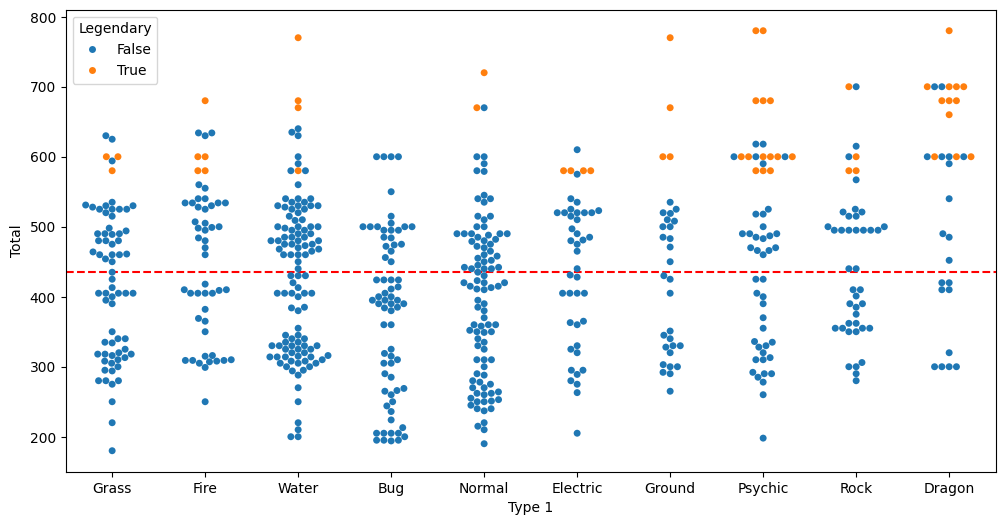

In [21]:
# Plot
plt.figure(figsize = (12,6))
sns.swarmplot(x = 'Type 1', y = 'Total', data = df_filtro, hue = 'Legendary') 
plt.axhline(df_filtro['Total'].mean(), color = 'red', linestyle = 'dashed')
plt.show()

<div style="background-color:#EBE7E1">
    
### <font face="Segoe Print" size="4" color='#CC403E'><strong>Parallel Coordinates</strong></font>

<font face="Segoe Print" size="3" color='#66666'>

Um **gráfico de coordenadas paralelas** fornece outra maneira de visualizar dados em muitas variáveis.

- https://pandas.pydata.org/docs/user_guide/visualization.html

In [22]:
# Filtra os dados por linha e por coluna
dados = (df2[(df2['Type 1'].isin(["Psychic", "Fighting"]))]
         .loc[:, ['Type 1', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def']])

<Axes: >

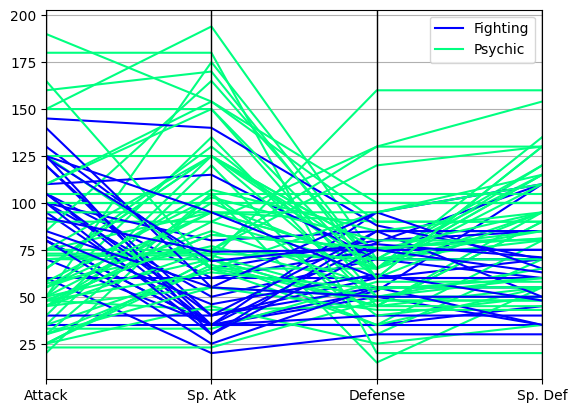

In [23]:
parallel_coordinates(dados, 'Type 1', colormap = "winter")

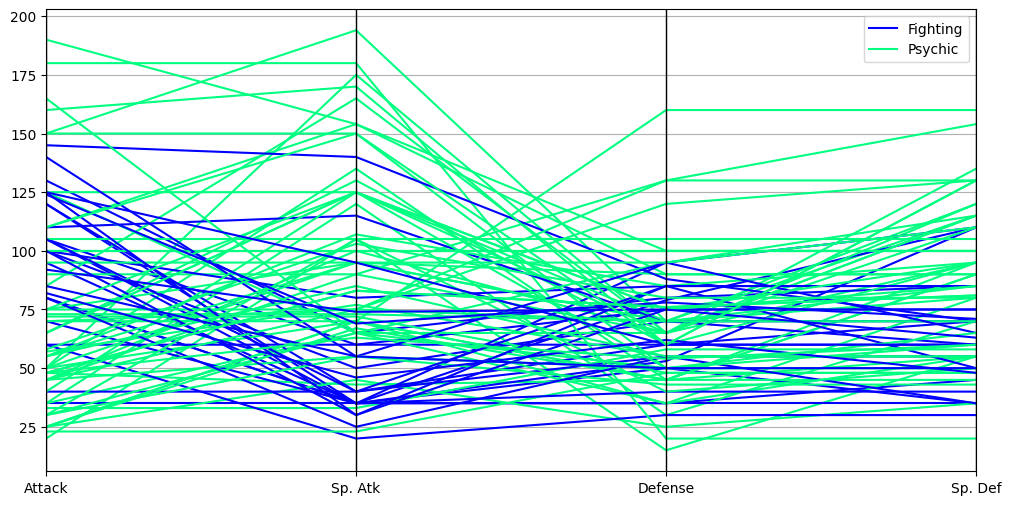

In [24]:
# Plot
plt.figure(figsize = (12,6))
parallel_coordinates(dados, 'Type 1', colormap = "winter")
plt.show()

<div style="background-color:#EBE7E1">
    
## <font face="Segoe Print" size="5" color='#CC403E'><strong>Trabalhando com o Dataset 3</strong></font>

<font face="Segoe Print" size="3" color='#66666'>

Um pequeno conjunto de dados clássico de Fisher, 1936. Um dos primeiros conjuntos de dados conhecidos usados ​​para avaliar métodos de classificação.

- Características do conjunto de dados = Tabular
- Área da matéria = Biologia
- Tarefas Associadas = Classificação
- Tipo de recurso = Real
- Instâncias = 150
- Características = 4

Informações do conjunto de dados

O que as instâncias neste conjunto de dados representam?

Cada instância é uma planta

Informações adicionais

- Este é um dos primeiros conjuntos de dados usados ​​na literatura sobre métodos de classificação e amplamente utilizado em estatística e aprendizado de máquina.
- O conjunto de dados contém 3 classes de 50 instâncias cada, onde cada classe se refere a um tipo de planta de íris.
- Uma classe é linearmente separável das outras 2; os últimos não são linearmente separáveis ​​​​entre si.
- Atributo previsto: classe de planta de íris.
- Este é um domínio extremamente simples.
- Esses dados diferem dos dados apresentados no artigo de Fisher (identificado por Steve Chadwick, spchadwick@espeedaz.net).
- A 35ª amostra deve ser: 4.9,3.1,1.5,0.2,"Iris-setosa" onde o erro está na quarta característica.
- A 38ª amostra: 4.9,3.6,1.4,0.1,"Iris-setosa" onde os erros estão no segundo e terceiro recursos.  

Tem valores ausentes? Não

In [25]:
# Carrega o dataset
df3 = pd.read_csv("dataset3.csv")

In [26]:
# Shape
df3.shape

(150, 5)

In [27]:
# Amostra
df.head()

,Value,Overall,Aggression,Position
100,42.0,84,55.0,ST
101,41.0,84,54.0,ST
103,31.0,84,41.0,GK
110,26.0,84,35.0,GK
113,28.0,84,51.0,ST


<div style="background-color:#EBE7E1">
    
### <font face="Segoe Print" size="4" color='#CC403E'><strong>Gráfico de Pares (Pair Plots)</strong></font>

<font face="Segoe Print" size="3" color='#66666'>

Os gráficos de pares mostram todas as relações de par entre um conjunto de variáveis. 

Cada par de variáveis é representado por um gráfico de dispersão.

- https://seaborn.pydata.org/generated/seaborn.pairplot.html

Trace relacionamentos de pares em um conjunto de dados.

- Por padrão, esta função criará uma grade de eixos de forma que cada variável numérica data será compartilhada entre os eixos y em uma única linha e os eixos x em uma única coluna. 

- Os gráficos diagonais são tratados de forma diferente: um gráfico de distribuição univariada é desenhado para mostrar a distribuição marginal dos dados em cada coluna.

- Também é possível mostrar um subconjunto de variáveis ​​ou representar graficamente diferentes variáveis ​​nas linhas e colunas.  

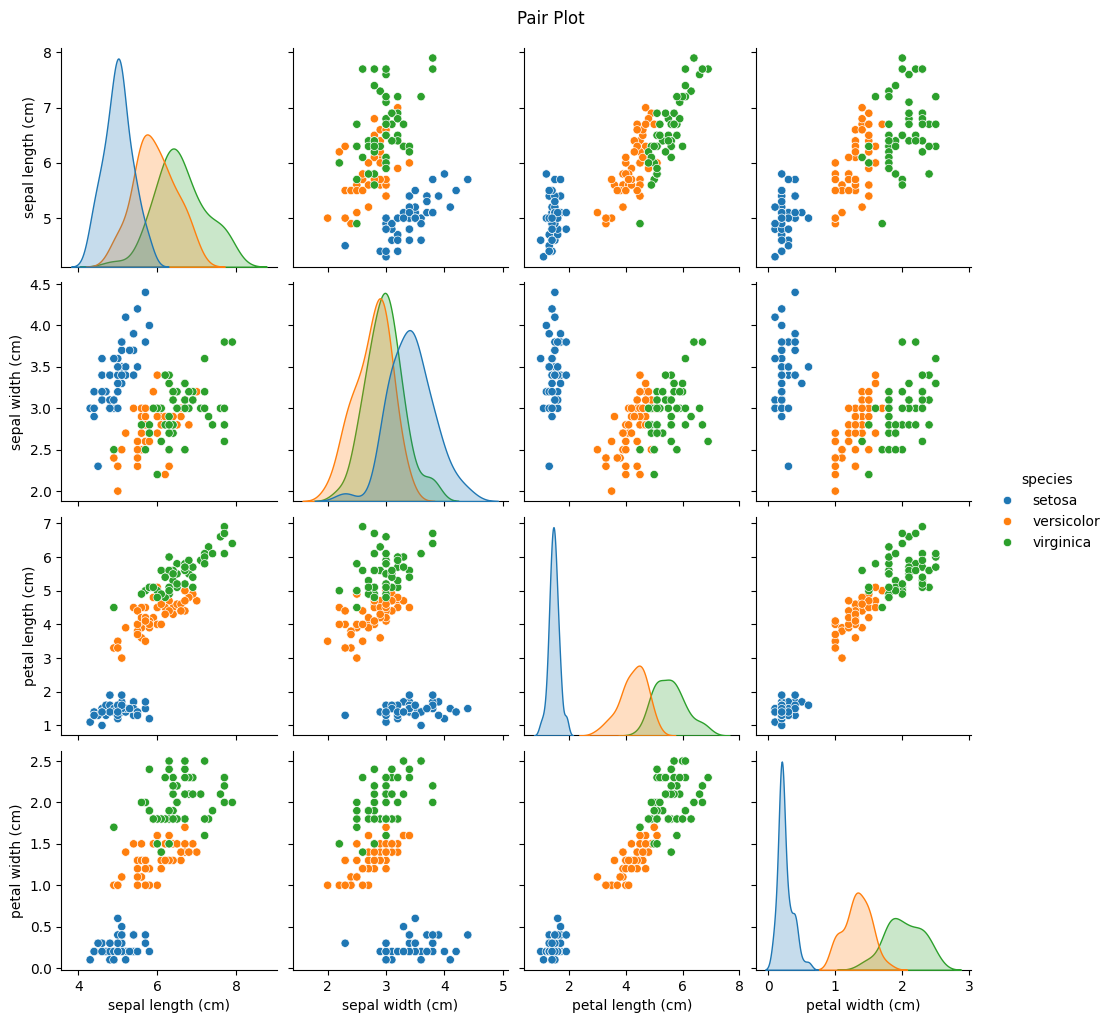

In [28]:
# Plot
sns.pairplot(df3, hue = 'species')
plt.suptitle("Pair Plot", y = 1.02)
plt.show()

<div style="background-color:#EBE7E1">
    
### <font face="Segoe Print" size="4" color='#CC403E'><strong>Gráfico de Radar (Radar Chart)</strong></font>

<font face="Segoe Print" size="3" color='#66666'>

Útil para comparar vários pontos de dados multivariados. 

Cada eixo do gráfico representa uma variável e os valores são plotados como pontos ao longo do eixo, conectados por linhas.

In [29]:
# Organiza os labels
labels = np.array(['sepal length', 'sepal width', 'petal length', 'petal width'])

In [30]:
# Exclui a coluna 'species' ao calcular a média
stats = df3.drop('species', axis=1).mean().values  

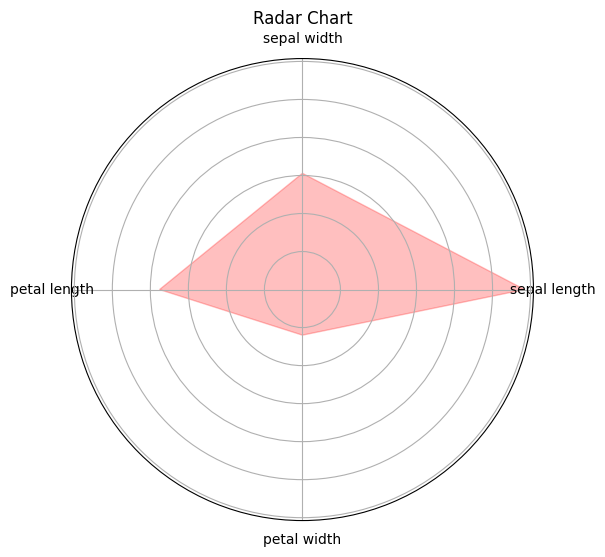

In [31]:
# Cria o gráfico
angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False).tolist()
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]
fig, ax = plt.subplots(figsize = (6, 6), subplot_kw = dict(polar = True))
ax.fill(angles, stats, color = 'red', alpha = 0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Radar Chart")
plt.show()

<div style="background-color:#EBE7E1">
    
### <font face="Segoe Print" size="4" color='#CC403E'><strong>Gráfico de Violino (Violin Plot)</strong></font>

<font face="Segoe Print" size="3" color='#66666'>

Semelhante aos box plots, mas também inclui a densidade de kernel dos dados, fornecendo uma representação mais rica da distribuição de dados.

https://seaborn.pydata.org/generated/seaborn.violinplot.html

Desenhe um patch representando um KDE e adicione observações ou estatísticas de box plot.

Uma trama de violino desempenha um papel semelhante a uma trama de caixa e bigode. Mostra a distribuição dos pontos de dados após agrupamento por uma (ou mais) variáveis. Ao contrário de um box plot, cada violino é desenhado usando uma estimativa de densidade do kernel da distribuição subjacente. 

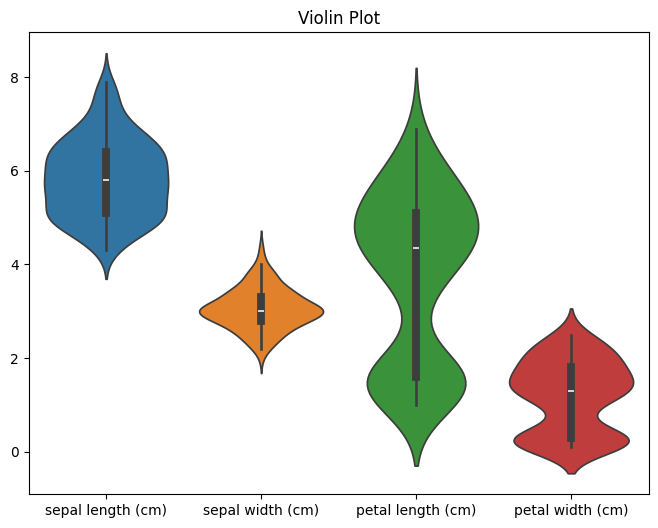

In [32]:
# Plot
plt.figure(figsize = (8, 6))
sns.violinplot(data = df3.drop('species', axis = 1))
plt.title("Violin Plot")
plt.show()

<div style="background-color:#EBE7E1">
    
### <font face="Segoe Print" size="4" color='#CC403E'><strong>tSNE (t-distributed Stochastic Neighbor Embedding)</strong></font>

<font face="Segoe Print" size="3" color='#66666'>

O t-SNE é uma técnica avançada para redução de dimensionalidade, amplamente utilizada para a visualização de dados de alta dimensionalidade em um espaço de baixa dimensão (geralmente duas ou três dimensões). 

Desenvolvido por Laurens van der Maaten e Geoffrey Hinton, o t-SNE é particularmente eficaz na visualização de conjuntos de dados complexos de Machine Learning ou de conjuntos de dados com muitas variáveis.

In [33]:
# Cria o modelo com 2 dimensões
tsne = TSNE(n_components = 2, random_state = 0)

In [34]:
# Treina o modelo com os dados multidimensionais
modelo_tsne = tsne.fit_transform(df3.drop('species', axis = 1))

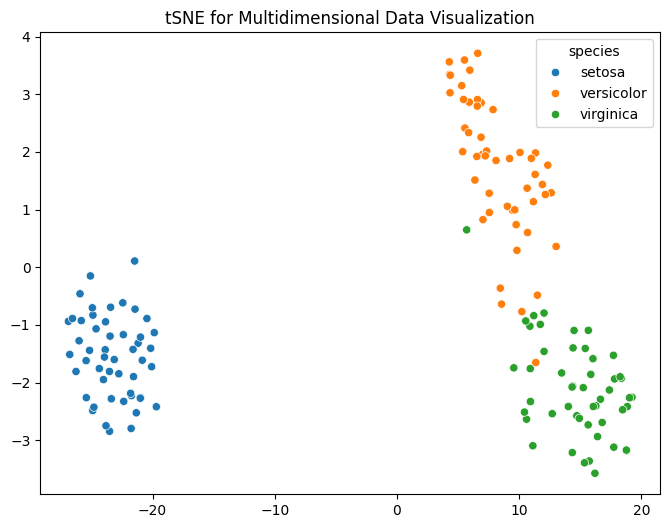

In [35]:
# Plot
plt.figure(figsize = (8, 6))
sns.scatterplot(x = modelo_tsne[:, 0], y = modelo_tsne[:, 1], hue = df3['species'])
plt.title("tSNE for Multidimensional Data Visualization")
plt.show()

In [36]:
%reload_ext watermark
%watermark -a "Roberto Soares - DSA"

Author: Roberto Soares - DSA



In [37]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.20.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores   : 4
Architecture: 64bit



In [38]:
%watermark --iversions

numpy     : 1.26.4
pandas    : 2.1.4
json      : 2.0.9
seaborn   : 0.13.2
sklearn   : 1.2.2
matplotlib: 3.8.4
sys       : 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]



<div style="background-color:#EBE7E1">
    
<font face="Segoe Print" size="3" color='#66666'>

Seaborn
- https://seaborn.pydata.org/

Matplotlib
- https://matplotlib.org/


<div style="background-color:#EBE7E1">
    
# <font face="Segoe Print" size="5" color='#CC403E'><strong>Fim</strong></font>

<font face="Segoe Print" size="3" color='#66666'>